### Understanding Hierarchical Clustering

In [29]:
# 2 types: Agglomerative & Divisive

# Agglomerative HC Algorithm:
# 1) Make each of the N data points into a single cluster
# 2) Take the 2 closest data points and make them into 
#    a single cluster
# 3) Take the 2 closest clusters and make them into 1 cluster
# 4) Repeat until there is only 1 cluster left

# How to measure distance between clusters:
# Euclidean distance between 2 closest points
# Euclidean distance between 2 furthest points
# Euclidean distance between cluster centroids
# Average between all distance combinations between points

# Dendrograms:
# At each step of the agglomerative HD algorithm
# Each cluster is stored in a dendrogram
# Dendograph Plots Distance vs. Data Points
# We can set a threshold distance to our dendrogram
# Thereby allowing us to pick the number of clusters

### Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [31]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Using a dendrogram to find the optimal number of clusters

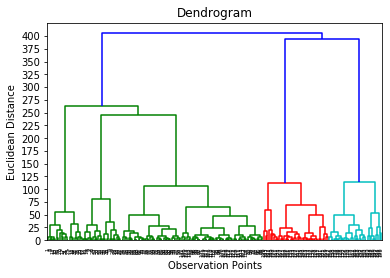

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
# "Ward" method is a method of minimum variance
# We minimize the variance of clusters
plt.title("Dendrogram")
plt.xlabel("Observation Points")
plt.ylabel("Euclidean Distance")
plt.yticks(range(0, 401, 25))
plt.show()
# On a dendrogram, finding the optimal number of clusters
# is done by locating the highest vertical jump
# We see the optimal number of clusters is 5 clusters

### Training the Agglomerative HC Model on the dataset

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualizing the Agglomerative HC Model Predictions

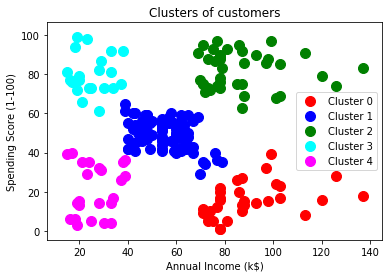

In [40]:
colors = ["red", "blue", "green", "cyan", "magenta"]
for i in range(0, 5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s = 100, c = colors[i], label= "Cluster" + " " + str(i))

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()